<a href="https://colab.research.google.com/github/joreilly86/Machine-Learning-for-Structural-Engineers/blob/main/flocode_stress_strain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stress and Strain in Structural Engineering: Interactive Examples

This Jupyter notebook accompanies the article "#035 - Stress and Strain in Structural Engineering: A Refresher" from [flocode.substack.com](https://flocode.substack.com).

## Introduction

This notebook contains interactive Python code examples that illustrate key concepts of stress and strain in structural engineering. By running and modifying these code cells, you can:

- Calculate stress and strain
- Visualize stress-strain relationships
- Explore Mohr's Circle
- Experiment with machine learning models for predicting material behavior

Feel free to modify the code, change parameters, and observe how the results change. This hands-on approach will help reinforce your understanding of these fundamental engineering concepts.

James 🌊

https://flocode.dev/

In [ ]:
# Function to calculate stress
def calculate_stress(force, area):
    return force / area

# Function to calculate strain
def calculate_strain(delta_length, original_length):
    return delta_length / original_length

# Example usage
force = 5000  # Newtons
area = 50  # mm²
delta_length = 0.2  # mm
original_length = 1000  # mm

stress = calculate_stress(force, area)
strain = calculate_strain(delta_length, original_length)

print(f"Stress: {stress} N/mm²")
print(f"Strain: {strain}")

Stress: 100.0 N/mm²
Strain: 0.0002


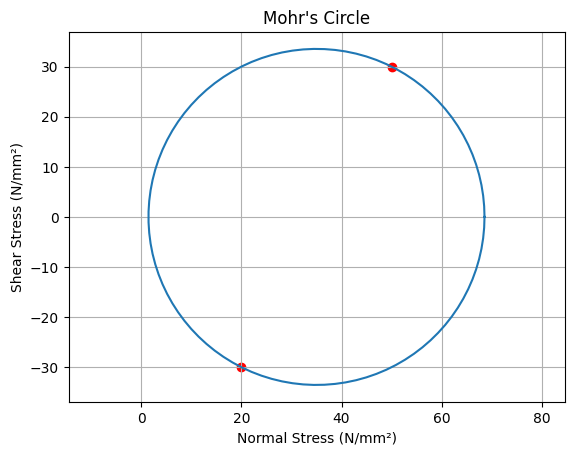

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mohr's Circle parameters
def mohrs_circle(sigma_x, sigma_y, tau_xy):
    center = (sigma_x + sigma_y) / 2
    radius = np.sqrt(((sigma_x - sigma_y) / 2) ** 2 + tau_xy ** 2)
    return center, radius

# Example usage
sigma_x = 50  # N/mm²
sigma_y = 20  # N/mm²
tau_xy = 30  # N/mm²

center, radius = mohrs_circle(sigma_x, sigma_y, tau_xy)
theta = np.linspace(0, 2 * np.pi, 100)
x = center + radius * np.cos(theta)
y = radius * np.sin(theta)

# Plotting Mohr's Circle
plt.plot(x, y)
plt.scatter([sigma_x, sigma_y], [tau_xy, -tau_xy], color='red')
plt.xlabel('Normal Stress (N/mm²)')
plt.ylabel('Shear Stress (N/mm²)')
plt.title("Mohr's Circle")
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
# Function to calculate factor of safety
def calculate_factor_of_safety(ultimate_strength, applied_stress):
    return ultimate_strength / applied_stress

# Example usage
ultimate_strength = 250  # N/mm² (e.g., for a particular grade of steel)
applied_stress = 150  # N/mm² (calculated from load and cross-sectional area)

factor_of_safety = calculate_factor_of_safety(ultimate_strength, applied_stress)

print(f"Factor of Safety: {factor_of_safety:.2f}")

Factor of Safety: 1.67


# Predicting Stress-Strain Relationship for Structural Steel

This notebook demonstrates how to use Python and machine learning to predict the stress-strain relationship for structural steel, which often exhibits non-linear behavior. The following steps are included:

1. Data Simulation
2. Polynomial Regression
3. Feature Scaling
4. Model Training
5. Regularization
6. Model Evaluation
7. Visualization
8. Annotations

## Importing Libraries

First, we import the necessary libraries for numerical computations, plotting, and machine learning.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
```

## Function for Stress-Strain Relationship

We define a function to model the stress-strain behavior of structural steel, including both elastic and plastic regions.

```python
def steel_stress_strain(strain, E=200000, yield_stress=250, ultimate_stress=400, ultimate_strain=0.005):
    elastic_strain = yield_stress / E
    plastic_strain = ultimate_strain - elastic_strain
    stress = np.where(
        strain <= elastic_strain,
        E * strain,
        yield_stress + (ultimate_stress - yield_stress) * (1 - np.exp(-(strain - elastic_strain) / (plastic_strain / 10)))
    )
    return np.minimum(stress, ultimate_stress)
```

## Data Simulation

We generate synthetic data that mimics a non-linear stress-strain curve, adding some random noise to simulate real-world variability.

```python
strain = np.linspace(0, 0.005, 1000).reshape(-1, 1)
stress = steel_stress_strain(strain.flatten()) + np.random.normal(0, 1, strain.shape).flatten()
```

## Data Splitting

We split the data into training and testing sets to evaluate the model's performance.

```python
X_train, X_test, y_train, y_test = train_test_split(strain, stress, test_size=0.2, random_state=42)
```

## Model Creation and Training

We create and train the model using a pipeline that includes feature scaling, polynomial regression, and ridge regression to prevent overfitting.

```python
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=5), Ridge(alpha=0.1))
model.fit(X_train, y_train)
```

## Model Evaluation

We make predictions and evaluate the model's performance using Mean Squared Error (MSE) and R-squared metrics.

```python
y_pred = model.predict(X_test)
mse, r2 = mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")
```

## Visualization

We plot the actual data and the model's predictions to visualize the stress-strain relationship.

```python
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')
sort_idx = np.argsort(X_test.ravel())
plt.plot(X_test[sort_idx], y_pred[sort_idx], color='red', linewidth=2, label='Predicted')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.title('Stress-Strain Curve for Typical Structural Steel')
plt.legend()
plt.grid(True)
plt.ylim(0, 450)
plt.xlim(0, 0.005)
```

## Adding Annotations

We add annotations to highlight key regions in the stress-strain curve.

```python
elastic_limit = 250 / 200000
annotations = [
    ('Elastic Region', (elastic_limit / 2, 125), (0.0015, 50)),
    ('Yield Point', (elastic_limit, 250), (0.002, 300)),
    ('Strain Hardening', (0.0035, 400), (0.004, 425))
]

for text, xy, xytext in annotations:
    plt.annotate(text, xy=xy, xytext=xytext, arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
```

## Conclusion

This notebook demonstrates how to use Python and machine learning to predict the non-linear stress-strain relationship of structural steel. By following these steps, you can gain valuable insights into material properties and design more resilient structures.

James 🌊

[flocode.dev](https://flocode.dev/)

Mean Squared Error: 44.75
R-squared Score: 0.9966


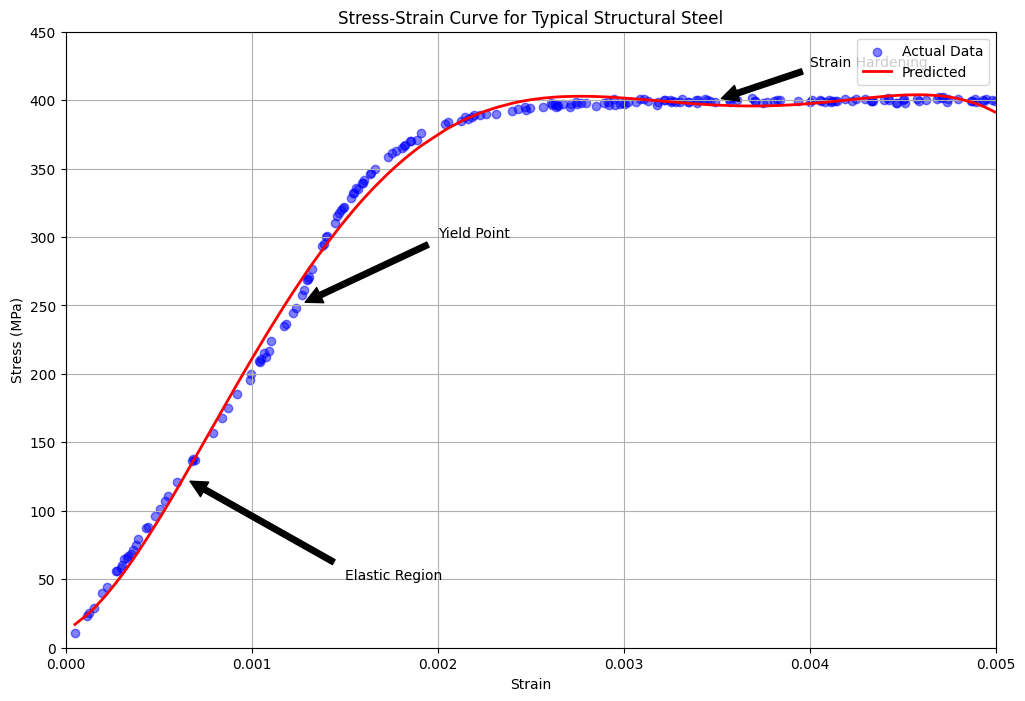

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

def steel_stress_strain(strain, E=200000, yield_stress=250, ultimate_stress=400, ultimate_strain=0.005):
    elastic_strain = yield_stress / E
    plastic_strain = ultimate_strain - elastic_strain
    stress = np.where(strain <= elastic_strain,
                      E * strain,
                      yield_stress + (ultimate_stress - yield_stress) *
                      (1 - np.exp(-(strain - elastic_strain) / (plastic_strain / 10))))
    return np.minimum(stress, ultimate_stress)

# Generate synthetic stress-strain data
strain = np.linspace(0, 0.005, 1000).reshape(-1, 1)
stress = steel_stress_strain(strain.flatten()) + np.random.normal(0, 1, strain.shape).flatten()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(strain, stress, test_size=0.2, random_state=42)

# Create and train the model
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=5), Ridge(alpha=0.1))
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse, r2 = mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}\nR-squared Score: {r2:.4f}")

# Plot results
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')
sort_idx = np.argsort(X_test.ravel())
plt.plot(X_test[sort_idx], y_pred[sort_idx], color='red', linewidth=2, label='Predicted')
plt.xlabel('Strain'), plt.ylabel('Stress (MPa)'), plt.title('Stress-Strain Curve for Typical Structural Steel')
plt.legend(), plt.grid(True), plt.ylim(0, 450), plt.xlim(0, 0.005)

# Add annotations
elastic_limit = 250 / 200000
annotations = [('Elastic Region', (elastic_limit/2, 125), (0.0015, 50)),
               ('Yield Point', (elastic_limit, 250), (0.002, 300)),
               ('Strain Hardening', (0.0035, 400), (0.004, 425))]
for text, xy, xytext in annotations:
    plt.annotate(text, xy=xy, xytext=xytext, arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()